# Distribution des nombres en fonction des premiers digits

Il s'agit d'un notebook permettant d'analyser la distribution des nombres d'un emsemble de nombre (ici, des données d'abondances de proteines) en fonction du premiers digits.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from collections import OrderedDict

import pybenford as ben

## Importation et préparation nombresdes données

In [2]:
if not os.path.exists("data_abundance_analysis/1512006-Calbicans-QUANTI.csv"):
    !wget http://ftp.pride.ebi.ac.uk/pride/data/archive/2019/07/PXD014125/1512006-Calbicans-QUANTI.csv
    data = pd.read_csv("1512006-Calbicans-QUANTI.csv", skiprows=2)
else:
    data = pd.read_csv("data_abundance_analysis/1512006-Calbicans-QUANTI.csv", skiprows=2)

In [3]:
data.shape

(2566, 45)

In [4]:
data.head()

,Accession,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,Highest mean condition,Lowest mean condition,Description,1512006-1,...,1512006-2.2,1512006-8.2,1512006-3.2,1512006-9.2,1512006-4.2,1512006-10.2,1512006-5_150410082104.2,1512006-11.2,1512006-6_150410115425.2,1512006-12.2
0,orf19.3365,1,1,29.90,0.000002,inf,Tris 2 60,Tris 1 60,DAO2 CGDID:CAL0004175 COORDS:Ca21chr4_C_albica...,6.290566e+04,...,0,0,0,0,0,0,0,0,0,1
1,orf19.5112,24,24,1946.82,0.000003,3.250834,Ctrl 60,Tris 2 10,TKL1 CGDID:CAL0002508 COORDS:Ca21chr1_C_albica...,3.401376e+07,...,30,21,19,18,17,13,19,24,22,29
2,orf19.3160,4,1,271.39,0.000008,inf,Tris 2 60,Ctrl 10,HSP12 CGDID:CAL0002358 COORDS:Ca21chr5_C_albic...,0.000000e+00,...,0,0,0,0,0,0,0,1,1,1
3,orf19.3646,13,13,604.54,0.000014,27.365113,Ctrl 60,Tris 2 60,CTR1 CGDID:CAL0000406 COORDS:Ca21chr6_C_albica...,1.052686e+07,...,4,3,4,3,15,8,1,2,5,5
4,orf19.1564,2,1,101.16,0.000020,inf,Tris 2 60,Ctrl 10,orf19.1564 CGDID:CAL0005564 COORDS:Ca21chr2_C_...,0.000000e+00,...,0,0,0,0,0,0,0,0,0,1


In [5]:
data.columns

Index(['Accession', 'Peptide count', 'Unique peptides', 'Confidence score',
       'Anova (p)', 'Max fold change', 'Highest mean condition',
       'Lowest mean condition', 'Description', '1512006-1', '1512006-7',
       '1512006-2', '1512006-8', '1512006-3', '1512006-9', '1512006-4',
       '1512006-10', '1512006-5_150410082104', '1512006-11',
       '1512006-6_150410115425', '1512006-12', '1512006-1.1', '1512006-7.1',
       '1512006-2.1', '1512006-8.1', '1512006-3.1', '1512006-9.1',
       '1512006-4.1', '1512006-10.1', '1512006-5_150410082104.1',
       '1512006-11.1', '1512006-6_150410115425.1', '1512006-12.1',
       '1512006-1.2', '1512006-7.2', '1512006-2.2', '1512006-8.2',
       '1512006-3.2', '1512006-9.2', '1512006-4.2', '1512006-10.2',
       '1512006-5_150410082104.2', '1512006-11.2', '1512006-6_150410115425.2',
       '1512006-12.2'],
      dtype='object')

In [6]:
normalized_columns = ['1512006-1', '1512006-7', '1512006-2', '1512006-8',
                      '1512006-3', '1512006-9', '1512006-4', '1512006-10',
                      '1512006-5_150410082104', '1512006-11',
                      '1512006-6_150410115425', '1512006-12']
raw_columns = ['1512006-1.1', '1512006-7.1', '1512006-2.1', '1512006-8.1',
               '1512006-3.1', '1512006-9.1', '1512006-4.1', '1512006-10.1',
               '1512006-5_150410082104.1', '1512006-11.1',
               '1512006-6_150410115425.1', '1512006-12.1']

In [7]:
data.describe()

,Peptide count,Unique peptides,Confidence score,Anova (p),Max fold change,1512006-1,1512006-7,1512006-2,1512006-8,1512006-3,...,1512006-2.2,1512006-8.2,1512006-3.2,1512006-9.2,1512006-4.2,1512006-10.2,1512006-5_150410082104.2,1512006-11.2,1512006-6_150410115425.2,1512006-12.2
count,2566.000000,2566.000000,2566.000000,2356.000000,2356.000000,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,2.356000e+03,...,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000
mean,5.966875,4.924006,329.951567,0.316327,inf,6.463053e+06,8.785142e+06,6.601764e+06,5.323631e+06,4.636626e+06,...,3.934918,2.997272,2.920109,2.801637,2.675370,1.516758,2.888153,3.286828,3.576383,4.000000
std,6.425649,5.917107,463.406302,0.289389,NaN,2.782584e+07,3.592861e+07,2.682403e+07,2.167646e+07,1.870482e+07,...,7.652240,5.576230,5.713587,5.313268,5.588438,3.486022,5.220402,5.935091,6.629855,7.488835
min,1.000000,0.000000,0.000000,0.000002,1.272817,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,62.225000,0.058240,2.417902,5.596203e+04,7.602239e+04,6.311675e+04,5.691979e+04,4.422048e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,157.265000,0.229864,3.866055,3.728819e+05,5.052376e+05,3.936991e+05,3.310843e+05,2.914040e+05,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,6.000000,389.705000,0.529185,10.111793,1.719191e+06,2.693200e+06,1.997724e+06,1.697935e+06,1.471927e+06,...,4.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,4.000000,4.000000,4.000000
max,52.000000,47.000000,3915.770000,0.996207,inf,5.453465e+08,8.120249e+08,5.426768e+08,4.442926e+08,3.503934e+08,...,96.000000,73.000000,73.000000,65.000000,70.000000,47.000000,56.000000,64.000000,82.000000,95.000000


In [8]:
norm_abundance = data[normalized_columns]
print(norm_abundance.shape)
# données dans un array d'une dimmenssion
norm_abundance = norm_abundance.values.reshape(norm_abundance.shape[0] * norm_abundance.shape[1])
print(norm_abundance.shape)
# remove 0
norm_abundance = norm_abundance[norm_abundance >= 1]
print(norm_abundance.shape)

(2566, 12)
(30792,)
(26921,)


In [9]:
print(min(norm_abundance))
print(max(norm_abundance))

1.0980649496244
1041290229.71853


## Distribution des nombres des digit
La liste `distrib_digit` contient 9 dictionnaire (pour les 9 digit), `distrib_digit_tot` est un dictionnaire. `distrib_digit` et `distrib_digit_tot` vont permettre de determiner la distribution des nombre en fonction des premiers digits (la distribution est réalisé en fonction de l'ordre de grandeur des nombres. exemple : 12 est compris entre \[10;19\] donc son ordre de grandeur est de 1 ($10^1$), 5420 est compris entre \[5000;5999\] donc son ordre de grandeur est de 3 ($10^3$).

In [10]:
distrib_digit = [{}, {}, {}, {}, {}, {}, {}, {}, {}]
distrib_digit_tot = {}

In [11]:
for number in norm_abundance:
    number = str(abs(int(number)))
    nb_digit = len(number)
    if nb_digit in distrib_digit[int(number[0])-1]:
        distrib_digit[int(number[0])-1][nb_digit] += 1
        distrib_digit_tot[nb_digit] += 1
    else:
        distrib_digit[int(number[0])-1][nb_digit] = 1
        distrib_digit_tot[nb_digit] = 1

#### triage des dictionnaires
Triage des dictionnaires par ordre croissant en fonction de leurs clées.

In [12]:
digit_distrib_order = []
for i in range(len(distrib_digit)):
    digit_distrib_order.append(dict(OrderedDict(sorted(distrib_digit[i].items()))))
distrib_digit = digit_distrib_order
distrib_digit

[{1: 5,
  2: 25,
  3: 108,
  4: 316,
  5: 998,
  6: 2545,
  7: 2707,
  8: 1043,
  9: 325,
  10: 1},
 {1: 10, 2: 22, 3: 83, 4: 232, 5: 841, 6: 1616, 7: 1339, 8: 412, 9: 78},
 {1: 6, 2: 15, 3: 69, 4: 187, 5: 712, 6: 1183, 7: 801, 8: 261, 9: 24},
 {1: 8, 2: 16, 3: 50, 4: 174, 5: 609, 6: 939, 7: 582, 8: 189, 9: 16},
 {1: 6, 2: 17, 3: 51, 4: 147, 5: 531, 6: 841, 7: 459, 8: 141, 9: 8},
 {1: 2, 2: 10, 3: 48, 4: 132, 5: 472, 6: 711, 7: 366, 8: 120},
 {1: 2, 2: 12, 3: 48, 4: 116, 5: 415, 6: 578, 7: 281, 8: 81, 9: 1},
 {1: 2, 2: 15, 3: 43, 4: 135, 5: 441, 6: 548, 7: 215, 8: 104, 9: 1},
 {1: 3, 2: 12, 3: 41, 4: 108, 5: 363, 6: 455, 7: 208, 8: 84}]

In [13]:
distrib_digit_tot = dict(OrderedDict(distrib_digit_tot.items()))
distrib_digit_tot

{5: 5352,
 6: 9399,
 8: 2370,
 4: 1492,
 7: 6920,
 3: 518,
 2: 121,
 9: 238,
 1: 23,
 10: 1}

### Représentation de la distribution des nombres tous digits confondus

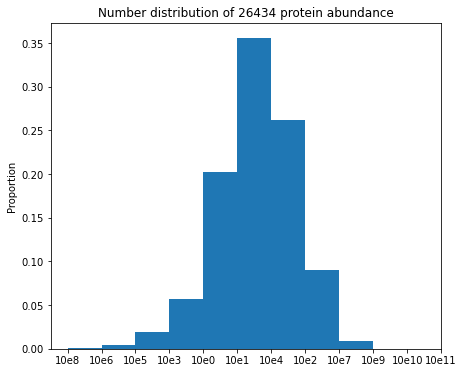

In [14]:
plt.figure(figsize=(7,6))
plt.bar(list(distrib_digit_tot.keys()),
        ben.normalize_first_digit(np.array(list(distrib_digit_tot.values()))),
        width=1, align="edge")
lab = []
for j in range(len(list(distrib_digit_tot.keys()))+2):
    lab.append(f"10e{j}")
plt.xticks(ticks=list(distrib_digit_tot.keys())+[11, 12],
               labels=lab)
plt.title(label=f"Number distribution of {sum(list(distrib_digit_tot.values()))} protein abundance")
plt.ylabel("Proportion");

### Représetation de la distribution des nombres pour les 9 digits

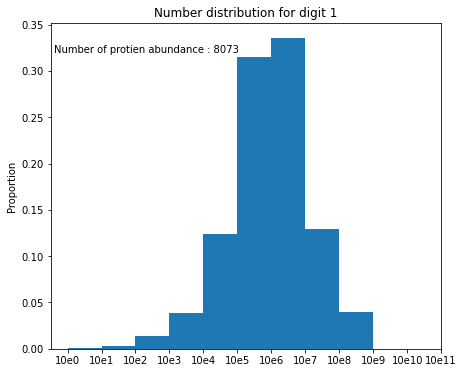

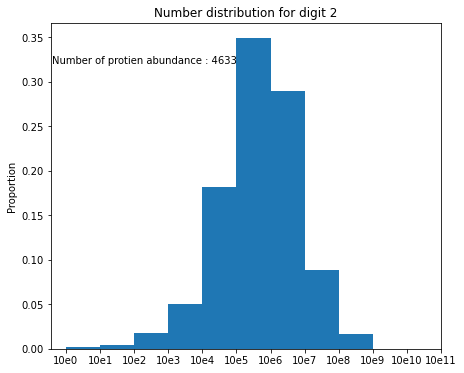

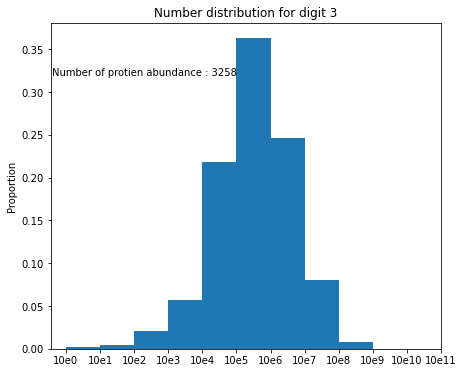

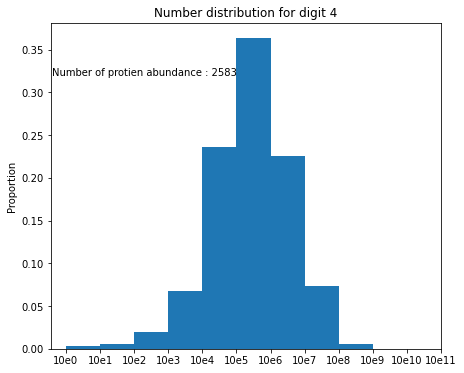

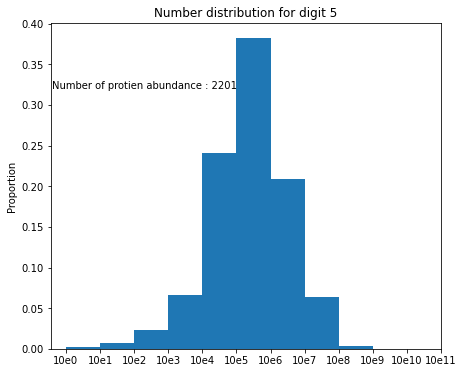

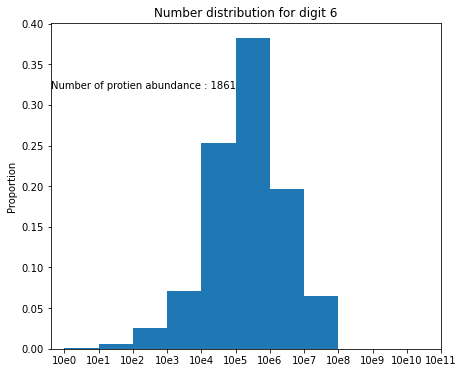

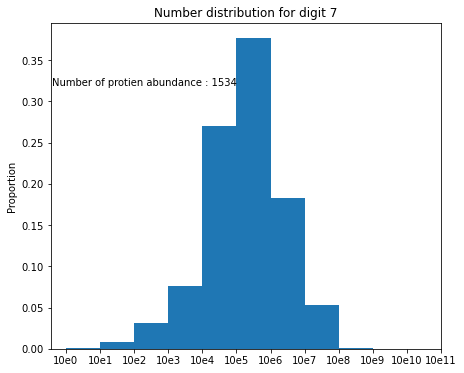

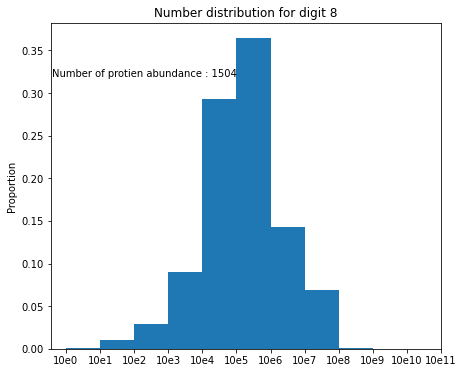

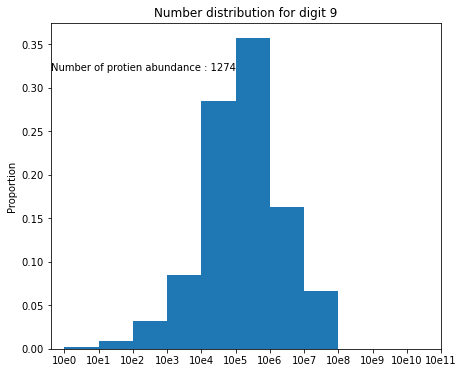

In [15]:

for i in range(len(distrib_digit)):
    plt.figure(figsize=(7,6))
    plt.bar(list(distrib_digit[i].keys()),
            ben.normalize_first_digit(np.array(list(distrib_digit[i].values()))),
           width=1, align="edge")
    lab = []
    for j in range(len(list(distrib_digit[0].keys()))+2):
        lab.append(f"10e{j}")
    plt.xticks(ticks=list(distrib_digit[0].keys())+[11, 12],
               labels=lab)
    plt.title(label=f"Number distribution for digit {i+1}")
    plt.ylabel("Proportion")
    plt.xlabel("")
    plt.text(0.6, 0.32, f"Number of protien abundance : {sum(list(distrib_digit[i].values()))}");

On remarque que la distribution des nombres en fonction de leurs premiers digits est équivalentes et ressemble à la distribution de l'ensemble des nombres de l'ensemble de nombre (26434 abondance de protéines).

## Frequence Benford second et dernier digit
### Second digit

In [16]:
def count_digit(numbers, digit, nb_digit=1):
    size_array = (10 ** nb_digit) - (10 ** (nb_digit - 1))
    # array size return
    digit_distrib = np.zeros(size_array, dtype=int)
    for number in numbers:
        number = abs(int(number))
        if len(str(number)) > digit-1:
            number = str(number)
            first = int(number[digit-1])
            digit_distrib[first - (10 ** (nb_digit - 1))] += 1

    return digit_distrib

In [17]:
second_digit = count_digit(norm_abundance, 2)
second_digit

array([2990, 3027, 2797, 2664, 2610, 2521, 2414, 2310, 5544])

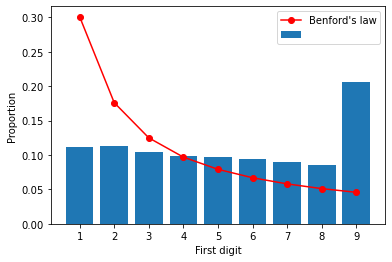

In [18]:
ben.build_hist_freq_ben(ben.normalize_first_digit(second_digit),
                        ben.get_theoretical_freq_benford(), 1)

On remarque que le second digit prit indépendement du premier digit ne suit pas la loi de Benford. 
### Last digit

In [19]:
def count_last_digit(numbers, nb_digit=1):
    size_array = (10 ** nb_digit) - (10 ** (nb_digit - 1))
    # array size return
    digit_distrib = np.zeros(size_array, dtype=int)
    for number in numbers:
        number = abs(int(number))
        number = str(number)
        first = int(number[-1])
        digit_distrib[first - (10 ** (nb_digit - 1))] += 1

    return digit_distrib

In [20]:
last_digit = count_last_digit(norm_abundance)
last_digit

array([2659, 2703, 2701, 2748, 2729, 2598, 2759, 2716, 5308])

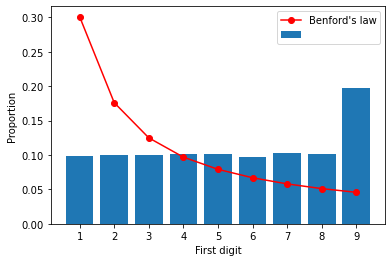

In [21]:
ben.build_hist_freq_ben(ben.normalize_first_digit(last_digit),
                        ben.get_theoretical_freq_benford(), 1)

Comme pour le second digit le dernier digit prit indépendement des digit qui le précède ne suit pas la loi de Benford.  

La loi de Benford s'applique exlusivement sur le premiers digit d'un ensemble de nombre ou au $n$ premiers digit d'un nombre ou encore $n^{\text{ième}}$ digit dépendant des digit qui le précède.

## Frequence Benford en fonction du nombre de grandeur choisi dans l'ensemble de nombre

In [22]:
filtered = norm_abundance[(norm_abundance > 10e4) & (norm_abundance < 10e8)]

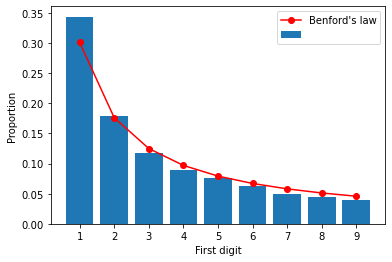

In [23]:
ben.build_hist_freq_ben(ben.normalize_first_digit(ben.count_first_digit(filtered)),
                        ben.get_theoretical_freq_benford(), 1)

En faisant varier l'intervalle du nombre d'ordre de grandeur choisi dans notre ensemble de nombre, on remarque que seul l'intégralité de l'ensembe de nombre suit la loi de Benford. Ici on remarque que les nombre compris entre 10 000 et 100 000 000 semble suivre la loi de benford sauf pour le digit 1 où l'on remarque que la fréquence observée est plus élevée que la fréquence de la loi de Benford.  

On peut en conclure que c'est seulement un ensemble de nombre complet qui suit la loi de Benford. Et qu'un sous-ensemble de cette ensemble de nombre de ne suit pas forcément la loi de Benford.

In [24]:
from scipy.stats import kstest

In [25]:
kstest(ben.get_theoretical_freq_benford(), ben.normalize_first_digit(ben.count_first_digit(norm_abundance)), N=9)

KstestResult(statistic=0.1111111111111111, pvalue=1.0)